# QUIZ 5 - Object Recognition: BoF vs ConvNetsTarefa

### Grupo: Luiz Gontijo, Marcos Vinicius, Matheus Pimenta

O objetivo deste Quiz é implementar e comparar duas maneiras de reconhecimento de objetos. 

In [193]:
import numpy as np
import pickle
import cv2 as cv
from matplotlib import pyplot as plt
import scipy.misc as smp

In [194]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [195]:
batch1 = unpickle("./cifar-10-python/cifar-10-batches-py/data_batch_1")
# for key in batch1:
#     print(key, '->', batch1[key])



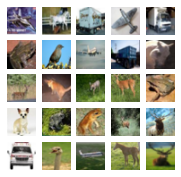

In [196]:
X = batch1[b"data"] 
Y = batch1[b'labels']
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

#Visualizing CIFAR 10
fig, axes1 = plt.subplots(5,5,figsize=(3,3))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0])


### Bag of Features

1. Dataset aleatório
2. SIFT pra cada uma das imagens
3. Comparar descritores do SIFT e separar em grupos (clusters)
4. Criar um representante para cada grupo (média do grupo)
5. Classificar todas as imagens (data e label)
    data = [[1,2,3],[1,3,5],...] | label = [0,1,2,...]
6. Passar pros modelos de aprendizado


⚫ It is composed of 4 steps
    1. Feature Extraction
    2. Visual Dictionary Creation
    3. Vector Quantization
    4. Image Representation

In [197]:
def get_SIFT_desc(img):
    sift = cv.SIFT_create()
    k, d = sift.detectAndCompute(img, None)
    return k, d

In [198]:

def get_random_img(dataset):
    X = dataset[b"data"] 
    X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
    i = np.random.choice(range(len(X)))
    return X[i:i+1][0]

In [199]:
def get_descriptors_n_imgs(dataset, n):
    descs = []
    for i in range(0,n):
        img = get_random_img(dataset)
        _, desc_array = get_SIFT_desc(img)

        if desc_array is not None:
            for elem in desc_array:
                descs.append(elem)

    descs = np.array(descs)
    return descs


def create_clusters(descs, k, attempts):
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _,_,center = cv.kmeans(descs,k,None,criteria,attempts,cv.KMEANS_RANDOM_CENTERS)
    return center

In [200]:
# TESTES
# img = get_random_img(batch1)
# k, d = get_SIFT_desc(img)
# copy = img.copy()
# copy = cv.drawKeypoints(img,k,copy,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# plt.imshow(copy)
# plt.show()
descs = get_descriptors_n_imgs(batch1, 100)
centers = create_clusters(descs, 10, 10)
print(centers)

[[  0.  52. 131. ...   7.   0.   0.]
 [  6.  17.   2. ...  47.   0.   0.]
 [ 75.   4.   0. ...  10.   0.   2.]
 ...
 [132. 119.   0. ...  27.  14.   9.]
 [  5.   3.   6. ...  69.  92.  10.]
 [  0.   0.   0. ...  20.  15.  11.]]
[[19.745098  17.333334  12.284314  ... 21.794119   6.696079   4.7058825]
 [12.9743595 26.128206  31.929487  ...  8.25       7.99359   17.852564 ]
 [33.384182  29.37853   20.58757   ...  2.977401   5.5480227  7.632768 ]
 ...
 [30.877659  36.212765  29.159573  ... 13.430851   9.904255  10.335106 ]
 [12.031496   7.3543305  8.377953  ...  3.937008   5.5433073 10.188976 ]
 [23.37288   18.118645  12.70339   ... 14.31356    6.516949   9.593221 ]]
